# Laboratorio opcional - Red neuronal simple
En este laboratorio construiremos una pequeña red neuronal utilizando Tensorflow.
   <center> <img src="./images/C2_W1_CoffeeRoasting.png" width="400" /> <center/>

<details><summary>Texto Original</summary>


# Optional Lab - Simple Neural Network
In this lab we will build a small neural network using Tensorflow.
   <center> <img  src="./images/C2_W1_CoffeeRoasting.png" width="400" />   <center/>

   ja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


## DataSet

In [2]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


Vamos a trazar los datos de tueste del café a continuación. Las dos características son la temperatura en Celsius y la duración en minutos. El sitio web [Coffee Roasting at Home](https://www.merchantsofgreencoffee.com/how-to-roast-green-coffee-in-your-oven/) sugiere que la duración se mantiene mejor entre 12 y 15 minutos, mientras que la temperatura debe estar entre 175 y 260 grados Celsius. Por supuesto, a medida que la temperatura aumenta, la duración debería reducirse. 

<details><summary>Texto Original</summary>


Let's plot the coffee roasting data below. The two features are Temperature in Celsius and Duration in minutes. [Coffee Roasting at Home](https://www.merchantsofgreencoffee.com/how-to-roast-green-coffee-in-your-oven/) suggests that the duration is best kept between 12 and 15 minutes while the temp should be between 175 and 260 degrees Celsius. Of course, as temperature rises, the duration should shrink. 

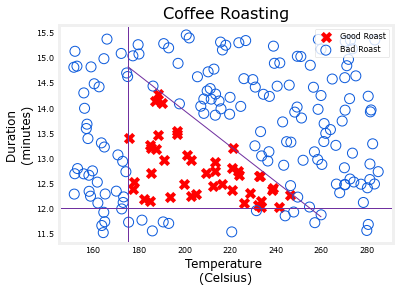

In [3]:
plt_roast(X,Y)

### Normalizar los datos
El ajuste de los pesos a los datos (retropropagación, tratada en las clases de la próxima semana) será más rápido si los datos están normalizados. Este es el mismo procedimiento que usaste en el Curso 1, donde las características de los datos se normalizan para tener un rango similar. 
El procedimiento de abajo utiliza una [capa de normalización] de Keras (https://keras.io/api/layers/preprocessing_layers/numerical/normalization/). Tiene los siguientes pasos:
- crear una "Capa de Normalización". Tenga en cuenta, como se aplica aquí, esto no es una capa en su modelo.
- Adaptar" los datos. Esto aprende la media y la varianza del conjunto de datos y guarda los valores internamente.
- normalizar los datos.  
Es importante aplicar la normalización a cualquier dato futuro que utilice el modelo aprendido.

<details><summary>Texto Original</summary>


### Normalize Data
Fitting the weights to the data (back-propagation, covered in next week's lectures) will proceed more quickly if the data is normalized. This is the same procedure you used in Course 1 where features in the data are each normalized to have a similar range. 
The procedure below uses a Keras [normalization layer](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/). It has the following steps:
- create a "Normalization Layer". Note, as applied here, this is not a layer in your model.
- 'adapt' the data. This learns the mean and variance of the data set and saves the values internally.
- normalize the data.  
It is important to apply normalization to any future data that utilizes the learned model.

In [4]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


Utizamos np.tile para hacer una copia de nuestros datos aumentando el tamaño del conjunto de entrenamiento y reducir el número de épocas de entrenamiento.

<details><summary>Texto Original</summary>



Tile/copy our data to increase the training set size and reduce the number of training epochs.

In [5]:

print(Xn.shape, Y.shape) 
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

(200, 2) (200, 1)
(200000, 2) (200000, 1)


## Tensorflow Model

### Modelo
   <center> <img src="./images/C2_W1_RoastingNetwork.PNG" width="200" /> <center/>  
Vamos a construir la "Red de Tostado de Café" descrita en la conferencia. Hay dos capas con activaciones sigmoides como se muestra a continuación:

<details><summary>Texto Original</summary>


### Model
   <center> <img  src="./images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  
Let's build the "Coffee Roasting Network" described in lecture. There are two layers with sigmoid activations as shown below:

In [6]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

>**Nota 1:** El `tf.keras.Input(shape=(2,)),` especifica la forma esperada de la entrada. Esto permite a Tensorflow dimensionar los pesos y los parámetros de sesgo en este punto.  Esto es útil cuando se exploran los modelos de Tensorflow. Esta declaración puede ser omitida en la práctica y Tensorflow dimensionará los parámetros de la red cuando los datos de entrada sean especificados en la declaración `model.fit`.  
>**Nota 2:** Incluir la activación sigmoidea en la capa final no se considera la mejor práctica. En su lugar, se contabilizaría en la pérdida, lo que mejora la estabilidad numérica. Esto se describirá con más detalle en un laboratorio posterior.

El `model.summary()` proporciona una descripción de la red:

<details><summary>Texto Original</summary>
 



>**Note 1:** The `tf.keras.Input(shape=(2,)),` specifies the expected shape of the input. This allows Tensorflow to size the weights and bias parameters at this point.  This is useful when exploring Tensorflow models. This statement can be omitted in practice and Tensorflow will size the network parameters when the input data is specified in the `model.fit` statement.  
>**Note 2:** Including the sigmoid activation in the final layer is not considered best practice. It would instead be accounted for in the loss which improves numerical stability. This will be described in more detail in a later lab.

The `model.summary()` provides a description of the network:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Los recuentos de parámetros mostrados en el resumen corresponden al número de elementos de las matrices de peso y sesgo, como se muestra a continuación.

<details><summary>Texto Original</summary>

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [8]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


Vamos a examinar los pesos y sesgos que Tensorflow ha instanciado.  Los pesos $W$ deberían tener un tamaño (número de características en la entrada, número de unidades en la capa) mientras que el tamaño del sesgo $b$ debería coincidir con el número de unidades en la capa:
- En la primera capa con 3 unidades, esperamos que W tenga un tamaño de (2,3) y que $b$ tenga 3 elementos.
- En la segunda capa con 1 unidad, esperamos que W tenga un tamaño de (3,1) y $b$ debe tener 1 elemento.

<details><summary>Texto Original</summary>


Let's examine the weights and biases Tensorflow has instantiated.  The weights $W$ should be of size (number of features in input, number of units in the layer) while the bias $b$ size should match the number of units in the layer:
- In the first layer with 3 units, we expect W to have a size of (2,3) and $b$ should have 3 elements.
- In the second layer with 1 unit, we expect W to have a size of (3,1) and $b$ should have 1 element.

In [9]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.08 -0.3   0.18]
 [-0.56 -0.15  0.89]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.43]
 [-0.88]
 [ 0.36]] 
b2(1,): [0.]


Las siguientes afirmaciones se describirán en detalle en la semana 2. Por ahora:
- La sentencia `model.compile` define una función de pérdida y especifica una optimización de compilación.
- La sentencia `model.fit` ejecuta el descenso de gradiente y ajusta los pesos a los datos.

<details><summary>Texto Original</summary>


The following statements will be described in detail in Week2. For now:
- The `model.compile` statement defines a loss function and specifies a compile optimization.
- The `model.fit` statement runs gradient descent and fits the weights to the data.

In [10]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 25s 4ms/step - loss: 0.1782
Epoch 2/10
6250/6250 [==============================] - 23s 4ms/step - loss: 0.1165
Epoch 3/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.0426
Epoch 4/10
6250/6250 [==============================] - 22s 3ms/step - loss: 0.0160
Epoch 5/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.0104
Epoch 6/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.0073
Epoch 7/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.0052
Epoch 8/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.0037
Epoch 9/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.0027
Epoch 10/10
6250/6250 [==============================] - 23s 4ms/step - loss: 0.0020


#### Pesos actualizados
Tras el ajuste, se han actualizado los pesos: 

<details><summary>Texto Original</summary>


#### Updated Weights
After fitting, the weights have been updated: 

In [11]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ -0.13  14.3  -11.1 ]
 [ -8.92  11.85  -0.25]] 
b1: [-11.16   1.76 -12.1 ]
W2:
 [[-45.71]
 [-42.95]
 [-50.19]] 
b2: [26.14]


A continuación, cargaremos algunos pesos guardados de una ejecución de entrenamiento anterior. Esto es para que este cuaderno siga siendo robusto a los cambios en Tensorflow con el tiempo. Diferentes ejecuciones de entrenamiento pueden producir resultados algo diferentes y la discusión a continuación se aplica a una solución particular. Siéntase libre de volver a ejecutar el cuaderno con esta celda comentada para ver la diferencia.


<details><summary>Texto Original</summary>


Next, we will load some saved weights from a previous training run. This is so that this notebook remains robust to changes in Tensorflow over time. Different training runs can produce somewhat different results and the discussion below applies to a particular solution. Feel free to re-run the notebook with this cell commented out to see the difference.

In [13]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

### Predicciones
<img align="left" src="./images/C2_W1_RoastingDecision.PNG" style=" width:380px; padding: 10px 20px; " >

Una vez que tenga un modelo entrenado, puede utilizarlo para hacer predicciones. Recordemos que la salida de nuestro modelo es una probabilidad. En este caso, la probabilidad de un buen asado. Para tomar una decisión, hay que aplicar la probabilidad a un umbral. En este caso, utilizaremos 0,5


<details><summary>Texto Original</summary>


### Predictions
<img align="left" src="./images/C2_W1_RoastingDecision.PNG"     style=" width:380px; padding: 10px 20px; " >

Once you have a trained model, you can then use it to make predictions. Recall that the output of our model is a probability. In this case, the probability of a good roast. To make a decision, one must apply the probability to a threshold. In this case, we will use 0.5

Empecemos por crear los datos de entrada. El modelo espera uno o más ejemplos donde los ejemplos están en las filas de la matriz. En este caso, tenemos dos características por lo que la matriz será (m,2) donde m es el número de ejemplos.
Recordemos que hemos normalizado las características de entrada, por lo que debemos normalizar también nuestros datos de prueba.   
Para hacer una predicción, se aplica el método `predict`.

<details><summary>Texto Original</summary>



Let's start by creating input data. The model is expecting one or more examples where examples are in the rows of matrix. In this case, we have two features so the matrix will be (m,2) where m is the number of examples.
Recall, we have normalized the input features so we must normalize our test data as well.   
To make a prediction, you apply the `predict` method.

In [14]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

predictions = 
 [[9.63e-01]
 [3.03e-08]]


#### Épocas y lotes
En la sentencia `compile` anterior, el número de `epocas` se estableció en 10. Esto especifica que todo el conjunto de datos debe ser aplicado durante el entrenamiento 10 veces.  Durante el entrenamiento, se ve la salida que describe el progreso del entrenamiento que se parece a esto:
```
Época 1/10
6250/6250 [==============================] - 6s 910us/paso - pérdida: 0.1782
```
La primera línea, `Epoch 1/10`, describe la época en la que se está ejecutando el modelo. Por eficiencia, el conjunto de datos de entrenamiento se divide en "lotes". El tamaño por defecto de un lote en Tensorflow es de 32. Hay 200000 ejemplos en nuestro conjunto de datos expandido o 6250 lotes. La notación en la segunda línea `6250/6250 [====` está describiendo qué lote se ha ejecutado.

<details><summary>Texto Original</summary>


#### Epochs and batches
In the `compile` statement above, the number of `epochs` was set to 10. This specifies that the entire data set should be applied during training 10 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/10
6250/6250 [==============================] - 6s 910us/step - loss: 0.1782
```
The first line, `Epoch 1/10`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 200000 examples in our expanded data set or 6250 batches. The notation on the 2nd line `6250/6250 [====` is describing which batch has been executed.

Para convertir las probabilidades en una decisión, aplicamos un umbral:

<details><summary>Texto Original</summary>


To convert the probabilities to a decision, we apply a threshold:

In [15]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


Esto puede lograrse de forma más sucinta:

<details><summary>Texto Original</summary>


This can be accomplished more succinctly:

In [16]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


## Funciones de las capas
Vamos a examinar las funciones de las unidades para determinar su papel en la decisión de tostar el café. Trazaremos la salida de cada nodo para todos los valores de las entradas (duración, temperatura). Cada unidad es una función logística cuya salida puede ir de cero a uno. El sombreado en el gráfico representa el valor de salida.
> Nota: En los laboratorios solemos numerar las cosas empezando por cero, mientras que las clases pueden empezar por 1.

<details><summary>Texto Original</summary>


## Layer Functions
Let's examine the functions of the units to determine their role in the coffee roasting decision. We will plot the output of each node for all values of the inputs (duration,temp). Each unit is a logistic function whose output can range from zero to one. The shading in the graph represents the output value.
> Note: In labs we typically number things starting at zero while the lectures may start with 1.

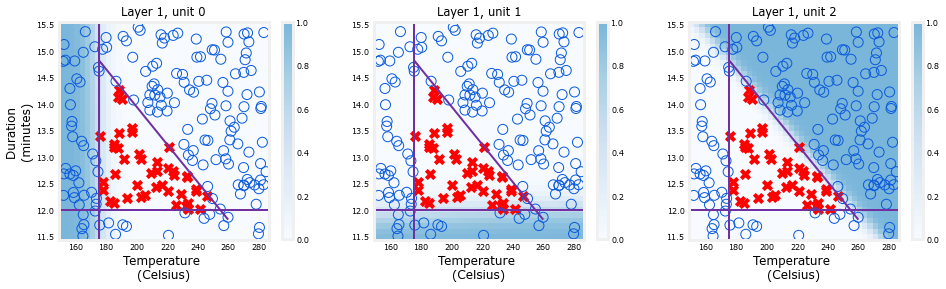

In [17]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

El sombreado muestra que cada unidad es responsable de una región diferente de "mal tueste". La unidad 0 tiene valores más grandes cuando la temperatura es demasiado baja. La unidad 1 tiene valores más grandes cuando la duración es demasiado corta y la unidad 2 tiene valores más grandes para malas combinaciones de tiempo/temperatura. Cabe destacar que la red aprendió estas funciones por sí sola mediante el proceso de descenso de gradiente. Son el mismo tipo de funciones que una persona podría elegir para tomar las mismas decisiones.

El gráfico de la función de la última capa es un poco más difícil de visualizar. Sus entradas son las salidas de la primera capa. Sabemos que la primera capa utiliza sigmoides por lo que su rango de salida está entre cero y uno. Podemos crear un gráfico 3D que calcule la salida para todas las combinaciones posibles de las tres entradas. Esto se muestra a continuación. Arriba, los valores de salida elevados corresponden a las zonas de "mal asado". Abajo, la salida máxima se encuentra en las zonas en las que las tres entradas tienen valores pequeños, que corresponden a las zonas de "buen tueste".

<details><summary>Texto Original</summary>



The shading shows that each unit is responsible for a different "bad roast" region. unit 0 has larger values when the temperature is too low. unit 1 has larger values when the duration is too short and unit 2 has larger values for bad combinations of time/temp. It is worth noting that the network learned these functions on its own through the process of gradient descent. They are very much the same sort of functions a person might choose to make the same decisions.

The function plot of the final layer is a bit more difficult to visualize. It's inputs are the output of the first layer. We know that the first layer uses sigmoids so their output range is between zero and one. We can create a 3-D plot that calculates the output for all possible combinations of the three inputs. This is shown below. Above, high output values correspond to 'bad roast' area's. Below, the maximum output is in area's where the three inputs are small values corresponding to 'good roast' area's.

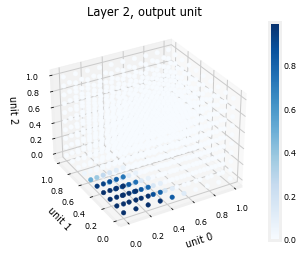

In [18]:
plt_output_unit(W2,b2)

El último gráfico muestra toda la red en acción.  
El gráfico de la izquierda es la salida bruta de la última capa representada por el sombreado azul. Se superpone a los datos de entrenamiento representados por las X y las O.   
El gráfico de la derecha es la salida de la red después de un umbral de decisión. Las X y las O corresponden a las decisiones tomadas por la red.  
Lo siguiente tarda un momento en ejecutarse

<details><summary>Texto Original</summary>


The final graph shows the whole network in action.  
The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.   
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network.  
The following takes a moment to run

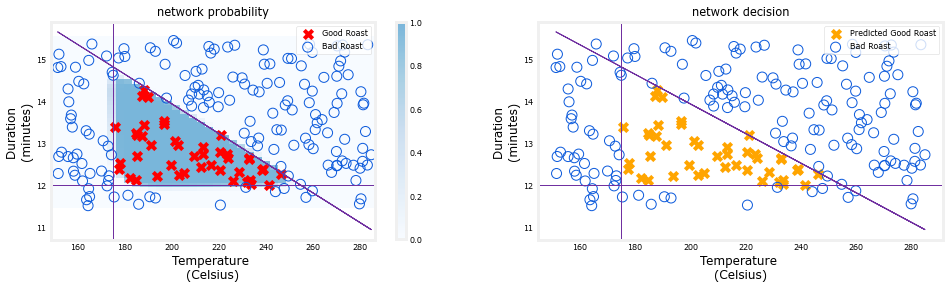

In [19]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)

## Congratulations!
You have built a small neural network in Tensorflow. 
The network demonstrated the ability of neural networks to handle complex decisions by dividing the decisions between multiple units.